In [1]:
import sys
sys.path.append('../keras_network/')
from keras.callbacks import TensorBoard, LearningRateScheduler
import tensorflow as tf
from configargparse import ArgParser
from models import conv_model, fc_model, conv_model_tile
from losses import *
from utils import *
from data_generator import DataGenerator
import matplotlib.pyplot
%matplotlib inline

Using TensorFlow backend.


In [2]:
from clr_callback import CyclicLR

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [4]:
data_dir = '/scratch/srasp/preprocessed_data/'
train_fn = '/purecrm_ess_train_sample1_shuffle'

In [5]:
train_gen = DataGenerator(
        data_dir,
        train_fn + '_features.nc',
        train_fn + '_targets.nc',
        1024,
        shuffle=True,
    )

Generator will have 23494656 samples in 22944 batches
Features have shape 152; targets have shape 120


In [6]:
feature_shape = train_gen.feature_shape
target_shape = train_gen.target_shape

In [66]:
model = fc_model(
    feature_shape,
    target_shape,
    [512, 512],
    1e-3,
    'mae',
    batch_norm=False,
    activation='tanh'
)

In [67]:
train_gen.n_batches

22944

In [76]:
clr = CyclicLR(base_lr=1e-4, max_lr=1e-4, step_size=500)

In [77]:
model.fit_generator(
        train_gen.return_generator(),
        500,
        epochs=1,
        workers=8,
        max_queue_size=50,
        callbacks=[clr],
    )

Epoch 1/1
  9/500 [..............................] - ETA: 19s - loss: 0.0155 - rmse: 0.0388 - log_loss: -1.5517 - total_error: 903.5354 - unexplained_error: 344.9223 - rsquared: 0.6177 - total_error_avgAx0: 660.6760 - rsquared_avgAx0: 0.4773

/export/home/srasp/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157385). Check your callbacks.
  % delta_t_median)


500/500 [==============================] - 9s 18ms/step - loss: 0.0140 - rmse: 0.0383 - log_loss: -1.5663 - total_error: 914.4673 - unexplained_error: 340.5744 - rsquared: 0.6275 - total_error_avgAx0: 664.8810 - rsquared_avgAx0: 0.4877


In [78]:
h = clr.history
lr = h['lr']
loss = h['loss']

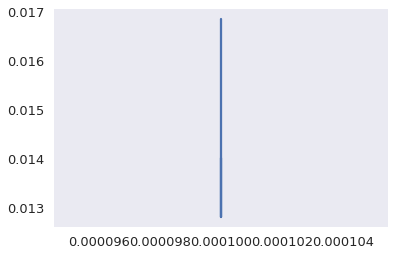

In [79]:
plt.plot(lr, loss)
#plt.gca().set_yscale('log')

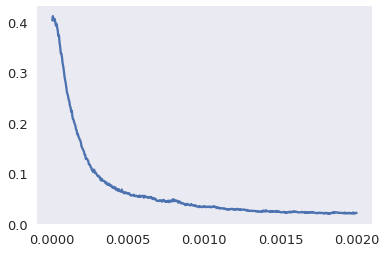

In [71]:
plt.plot(lr, loss)
#plt.gca().set_yscale('log')

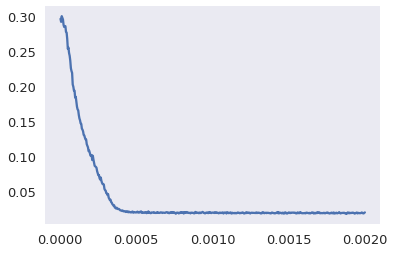

In [49]:
plt.plot(lr, loss)
#plt.gca().set_yscale('log')